In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.signal
from mpl_toolkits.mplot3d import axes3d

In [17]:
#IMPORTING DATA FROM VARIOUS MYOMETRIAL CONTRACTILITY STUDIES
#importing data from Study 1 on Muscle Bath Computer 1 (mbc1)

#importing data from Study 3 on Muscle Bath Computer 1 (mbc1)
df_study3_mbc1 = pd.read_csv('./2018_08_17_Myometrial_Contractility_Study_3_MB_1_8.tsv', sep='\t')
#importing data from Study 4 on Muscle Bath Computer 1 (mbc1)
df_study4_mbc1 = pd.read_csv('./2018_08_22_Myometrial_Contractility_Study_4_MB_1_8.tsv', sep='\t')
#importing data from Study 4 on Muscle Bath Computer 2 (mbc2)
df_study4_mbc2 = pd.read_csv('./2018_08_22_Myometrial_Contractility_Study_4_MB_9_16.tsv', sep='\t')
#importing data from Study 5

#importing data from Study 6
df_s6_mbc1 = pd.read_csv('./2018_08_31_Myometrial_Contractility_Study_6_MB_1_8.tsv', sep='\t')
#importing data from Study 7
df_s7_mbc1 = pd.read_csv('./2018_09_05_Myometrial_Contractility_Study_7_MB_1_8.tsv', sep='\t')
#importing data from Study 8
df_s8_mbc1 = pd.read_csv('./2018_09_06_Myometrial_Contractility_Study_8_MB_1_8.tsv',sep='\t')
#importing data from Study 9 on Muscle Bath Computer 1 (mbc1)
df_s9_mbc1 = pd.read_csv('./2018_09_12_Myometrial_Contractility_Study_9_MB_1_8.tsv',sep='\t')
#importing data from Study 9 on Muscle Bath Computer 2 (mbc2)
df_s9_mbc2 = pd.read_csv('./2018_09_12_Myometrial_Contractility_Study_9_MB_9_16.tsv',sep='\t')
#importing data from Study 10 on Muscle Bath Computer 2 (mbc2)
df_s10_mbc2 = pd.read_csv('./2018_09_18_Myometrial_Contractility_Study_10_MB_9_16_Restart_Restart.tsv',sep='\t')
#importing data from Study 10 on Muscle Bath Computer 3 (mbc3)
df_s10_mbc3 = pd.read_csv('./2018_09_18_Myometrial_Contractility_Study_10_MB_17_24.tsv',sep='\t')

In [18]:
#BASIC FORMATING OF DATA FRAMES
#study 3
#dropping unecessary columns
df_study3_mbc1 = df_study3_mbc1.drop(columns=['Timestamp','Stimulus'])
#setting the experiment time as index
df_study3_mbc1.set_index('Experiment Time', inplace=True)
#study 4
#muscle bath computer 1
#dropping unecessary columns 
df_study4_mbc1 = df_study4_mbc1.drop(columns=['Timestamp','Stimulus'])
#setting the experiment time as index
df_study4_mbc1.set_index('Experiment Time', inplace=True)
#muscle bath computer 2
#dropping unecessary columns
df_study4_mbc2 = df_study4_mbc2.drop(columns = ['Timestamp','Stimulus'])
#setting the experiment time as index
df_study4_mbc2.set_index('Experiment Time', inplace = True)
#study 5

#study 6
#dropping unecessary columns
df_s6_mbc1 = df_s6_mbc1.drop(columns = ['Timestamp','Stimulus'])
#setting the experiment time as index
df_s6_mbc1.set_index('Experiment Time', inplace = True)
#study 7
#dropping unecessary columns
df_s7_mbc1 = df_s7_mbc1.drop(columns = ['Timestamp','Stimulus'])
#setting the experiment time as index
df_s7_mbc1.set_index('Experiment Time', inplace = True)
#study 8
#dropping unecessary columns
df_s8_mbc1 = df_s8_mbc1.drop(columns = ['Timestamp','Stimulus'])
#setting the experiment time as index
df_s8_mbc1.set_index('Experiment Time', inplace = True)
#study 9
#muscle bath computer 1
#dropping unecessary columns
df_s9_mbc1 = df_s9_mbc1.drop(columns = ['Timestamp','Stimulus'])
#setting the experiment time as index
df_s9_mbc1.set_index('Experiment Time', inplace = True)
#muscle bath computer 2
#dropping unecessary columns
df_s9_mbc2 = df_s9_mbc2.drop(columns = ['Timestamp','Stimulus'])
#setting the experiment time as index
df_s9_mbc2.set_index('Experiment Time',inplace = True)
#study 10
#mbc2
#dropping unecessary columns
df_s10_mbc2 = df_s10_mbc2.drop(columns= ['Timestamp','Stimulus'])
#setting the experiment time as index
df_s10_mbc2.set_index('Experiment Time',inplace = True)
#mbc3
#dropping unecessary columns
df_s10_mbc3 = df_s10_mbc3.drop(columns = ['Timestamp','Stimulus'])
#setting the experiment time as index 
df_s10_mbc3.set_index('Experiment Time',inplace = True)


In [19]:
#LIST THE DIFFERENT COMMENTS
print("Study 3 mbc1 comments:%s" %df_study3_mbc1.Comments.unique())
print("Study 4 mbc1 comments:%s" %df_study4_mbc1.Comments.unique())
print("Study 4 mbc2 comments:%s" %df_study4_mbc2.Comments.unique())
#print
print("Study 6 mbc1 comments:%s" %df_s6_mbc1.Comments.unique())
print("Study 7 mbc1 comments:%s" %df_s7_mbc1.Comments.unique())
print("Study 8 mbc1 comments:%s" %df_s8_mbc1.Comments.unique())
print('Study 9 mbc1 comments:%s' %df_s9_mbc1.Comments.unique())
print('Study 9 mbc2 comments:%s' %df_s9_mbc2.Comments.unique())
print('Study 10 mbc 2 comments:%s' %df_s10_mbc2.Comments.unique())
print('Study 10 mbc 3 comments:%s' %df_s10_mbc3.Comments.unique())

Study 3 mbc1 comments:[nan 'Pitocin' 'Baseline' 'Treatment' 'Recovery']
Study 4 mbc1 comments:[nan 'Pitocin Bath 1' 'Pitocin Bath 3' 'Pitocin Bath 5' 'Pitocin Bath 7'
 'Baseline' 'Treatment Bath 1' 'Treatment Bath 2' 'Treatment Bath 5'
 'Treatment Bath 7' 'Treatment Bath 8']
Study 4 mbc2 comments:[nan 'Pitocin Bath 9' 'Pitocin Bath 11' 'Baseline' 'Treatment Bath 10'
 'Treatment Bath 11']
Study 6 mbc1 comments:[nan 'Pitocin' 'Baseline' 'Treatment Bath 1' 'Treatment Bath 2'
 'Treatment Bath 3' 'Treatment Bath 4' 'Treatment Bath 5'
 'Treatment Bath 6' 'Treatment Bath 8']
Study 7 mbc1 comments:[nan 'Pitocin' 'Baseline' 'Treatment Bath 1' 'Treatment Bath 2'
 'Treatment Bath 3' 'Treatment Bath 4' 'Treatment Bath 5'
 'Treatment Bath 6']
Study 8 mbc1 comments:[nan 'Pitocin' 'Baseline' 'Treatment Bath 1' 'Treatment Bath 2'
 'Treatment Bath 3' 'Treatment Bath 4' 'Treatment Bath 6'
 'Treatment Bath 8']
Study 9 mbc1 comments:[nan 'Pitocin' 'Baseline' 'Treatment Bsth 1' 'Treatment Bath 1'
 'Treatme

In [5]:
#ASSIGN VARIABLE NAMES TO BASELINE INDEXES (EXPERIMENTAL TIME)
#
s3mbc1_baseindx = df_study3_mbc1.index[df_study3_mbc1['Comments'] == 'Baseline']
#
s4mbc1_baseindx = df_study4_mbc1.index[df_study4_mbc1['Comments'] == 'Baseline']
#
s4mbc2_baseindx = df_study4_mbc2.index[df_study4_mbc2['Comments'] == 'Baseline']

In [6]:
#ASSIGN VARIABLE NAMES TO TREATMENT INDEXES (EXPERIMENTAL TIME)
#Study 3 - all baths
s3mbc1_treatindx = df_study3_mbc1.index[df_study3_mbc1['Comments'] == 'Recovery']
#Study 4 - Muscle Bath 1
s4_mb1_treatindx = df_study4_mbc1.index[df_study4_mbc1['Comments'] == 'Treatment Bath 1']
#Study 4 - Muscle Bath 2
s4_mb2_treatindx = df_study4_mbc1.index[df_study4_mbc1['Comments'] == 'Treatment Bath 2']
#Study 4 - Muscle Bath 3 
s4_mb3_treatindx = df_study4_mbc1.index[df_study4_mbc1['Comments'] == 'Treatment Bath 5'] #forgot to comment for bath 3
#Study 4 - Muscle Bath 4
s4_mb4_treatindx = df_study4_mbc1.index[df_study4_mbc1['Comments'] == 'Treatment Bath 5'] #forgot to comment for bath 4
#Study 4 - Muscle Bath 5
s4_mb5_treatindx = df_study4_mbc1.index[df_study4_mbc1['Comments'] == 'Treatment Bath 5'] 
#Study 4 - Muscle Bath 6
s4_mb6_treatindx = df_study4_mbc1.index[df_study4_mbc1['Comments'] == 'Treatment Bath 7'] #forgot to comment for bath 6
#Study 4 - Muscle Bath 7
s4_mb7_treatindx = df_study4_mbc1.index[df_study4_mbc1['Comments'] == 'Treatment Bath 7'] 
#Study 4 - Muscle Bath 8
s4_mb8_treatindx = df_study4_mbc1.index[df_study4_mbc1['Comments'] == 'Treatment Bath 8']
#Study 4 - Muscle Bath 9
s4_mb9_trtindx = df_study4_mbc2.index[df_study4_mbc2['Comments'] == 'Treatment Bath 10']
#Study 4 - Muscle Bath 10
s4_mb10_trtindx = df_study4_mbc2.index[df_study4_mbc2['Comments'] == 'Treatment Bath 10']
#Study 4 - Muscle Bath 11
s4_mb11_trtindx = df_study4_mbc2.index[df_study4_mbc2['Comments'] == 'Treatment Bath 11']
#Study 5

# comnts = ['Treatment Bath 10','Treatment Bath 11','Treatment Bath 12']
# for i in range(0,3):
#     [s4_mb9_trtindx,s4_mb10_trtindx,s4_mb11_trtindx][i] = np.array(df_study4_mbc2.index(df_study4_mbc2['Comments'] == comnts))

Myometrial Contractility Study Graphs

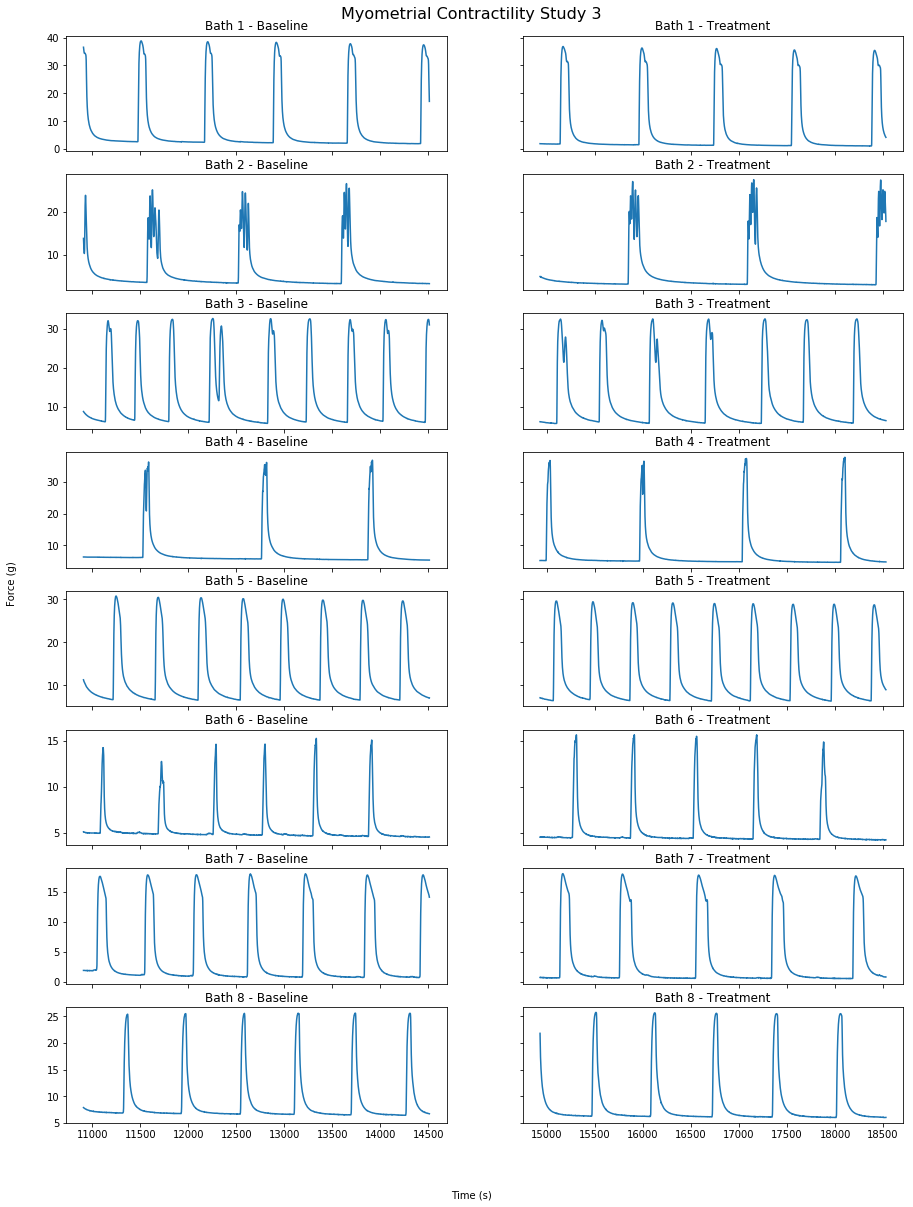

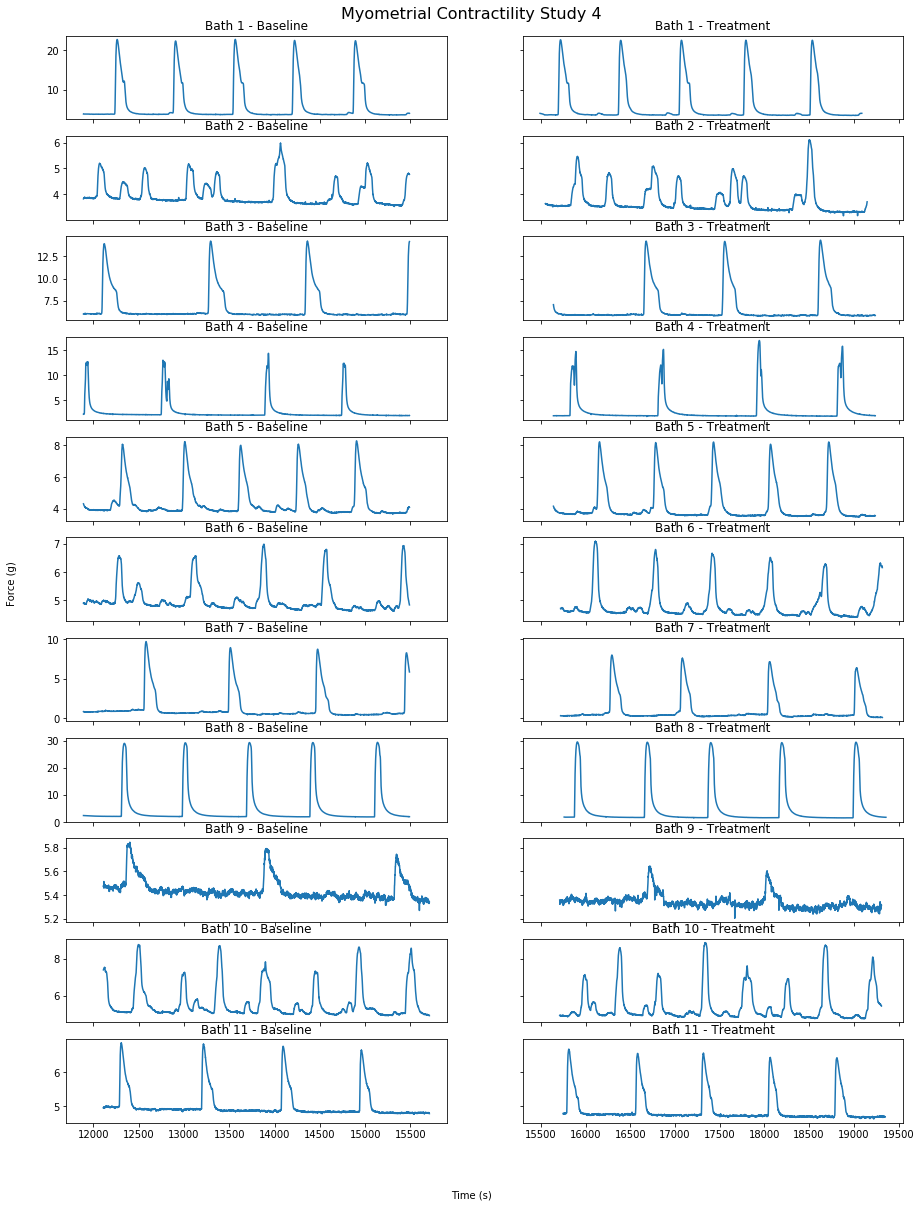

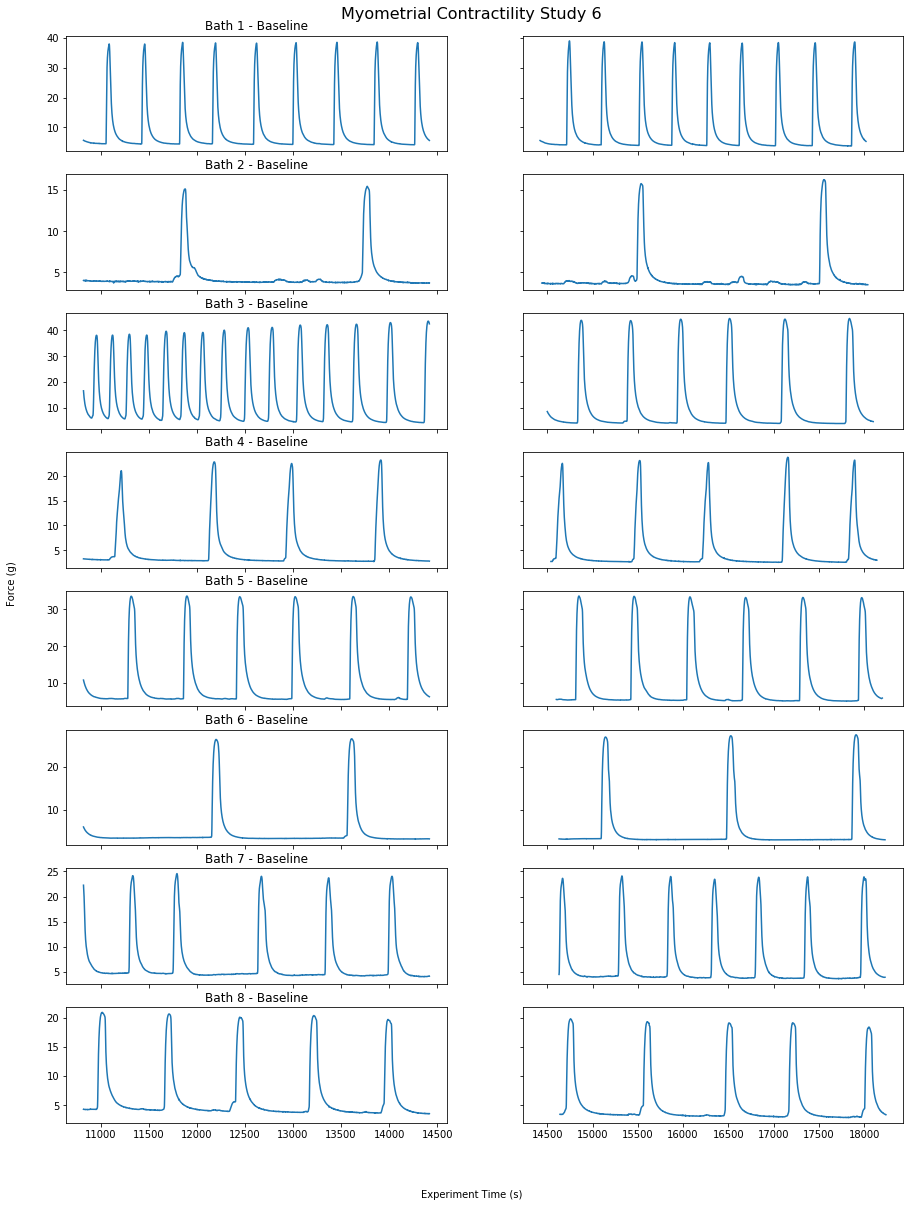

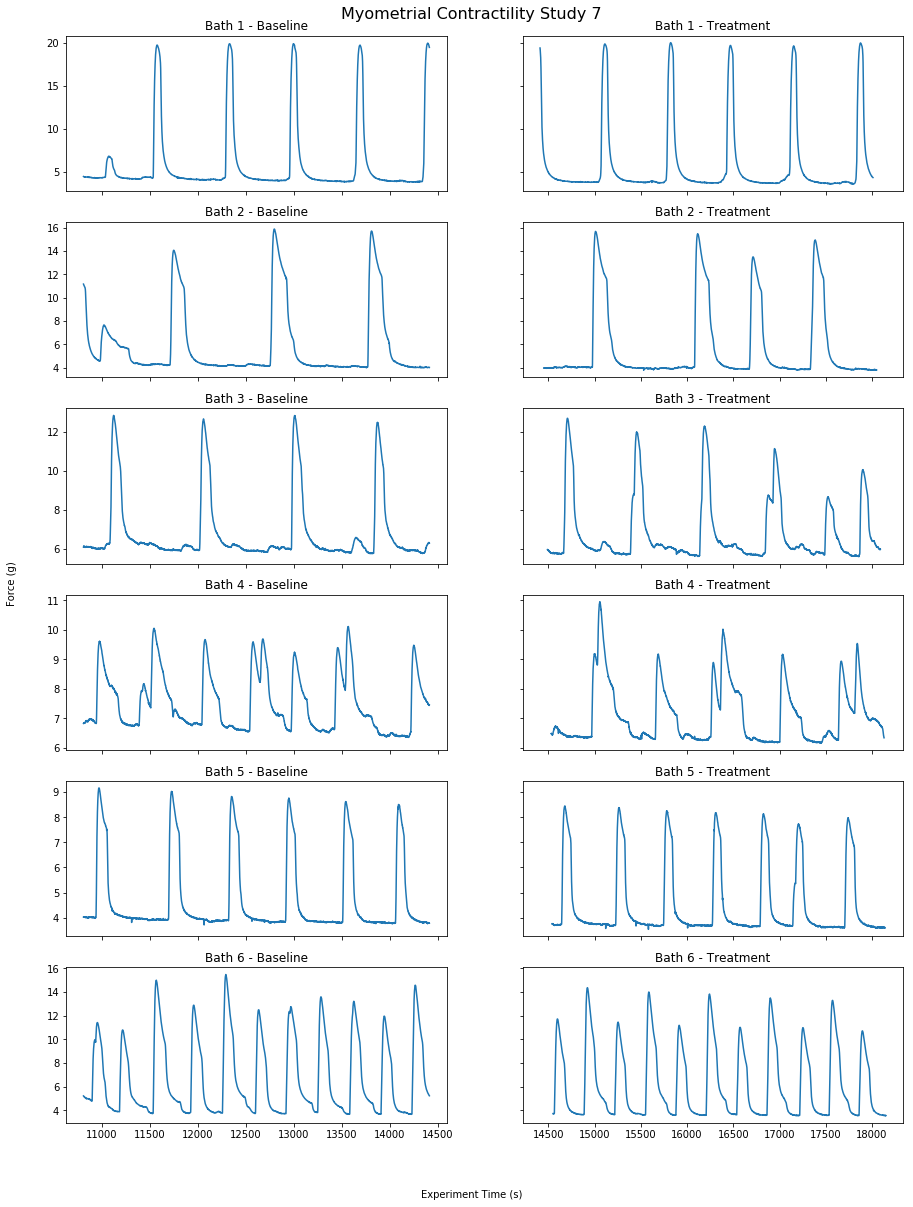

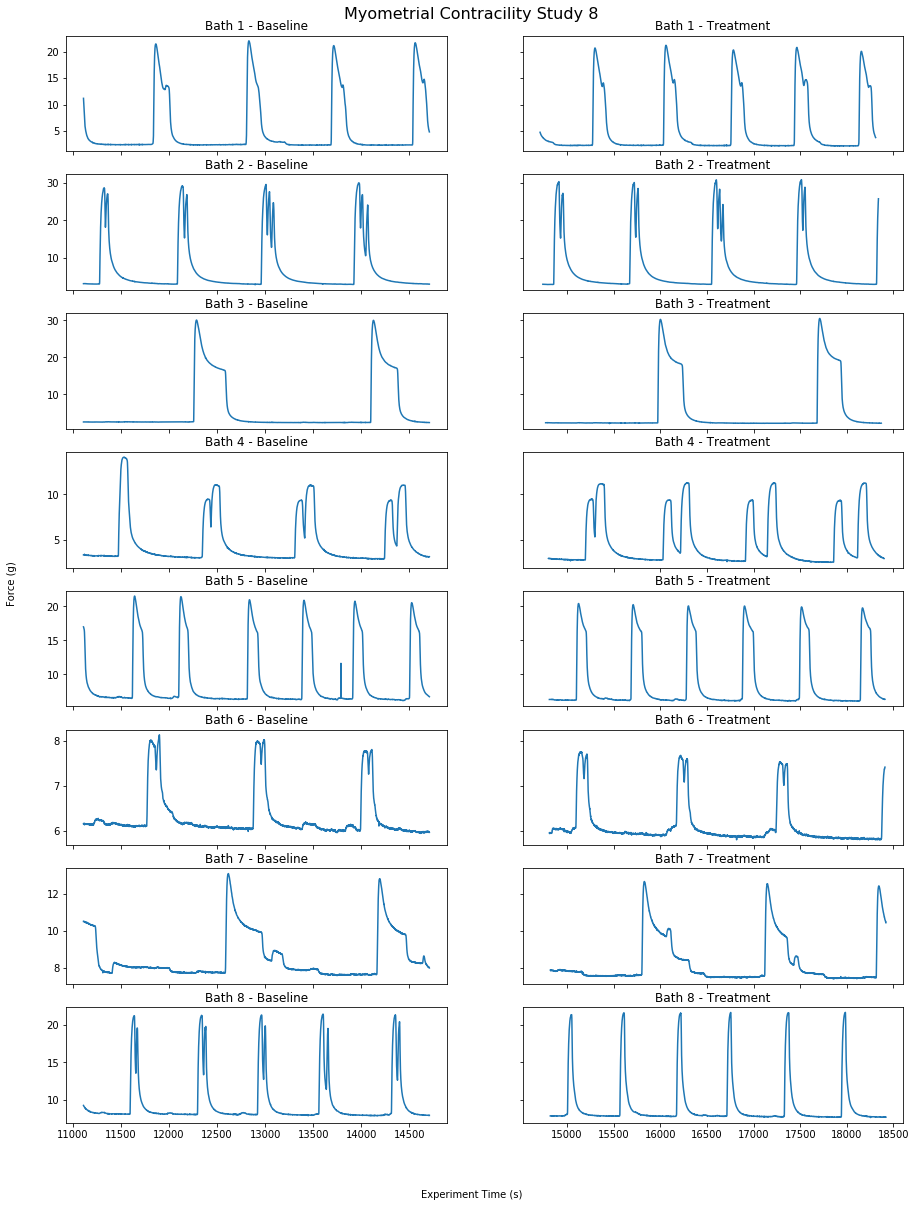

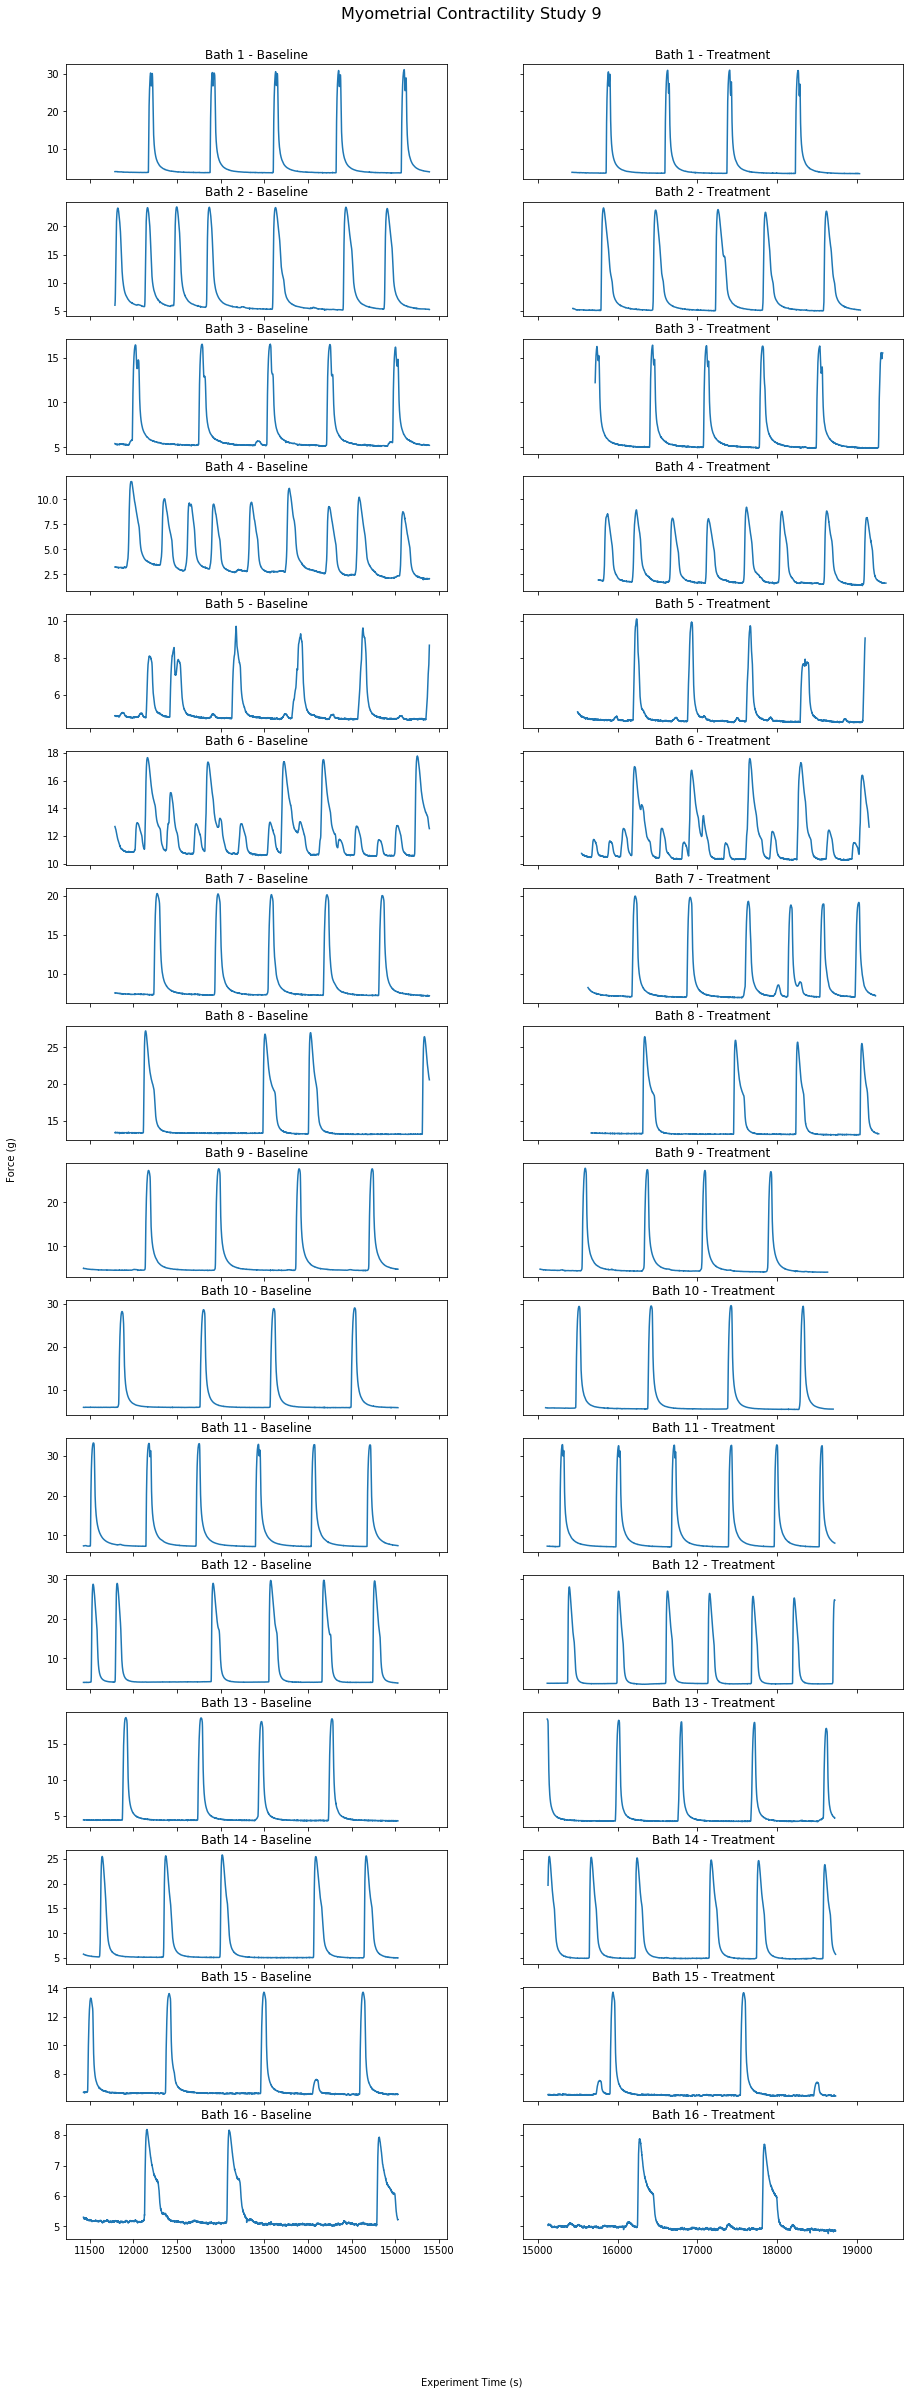

In [7]:
##### PLOT BASELINES AND TREATMENTS FOR INDIVIDUAL MUSCLE BATHS IN EACH STUDY
#Study 3, improved_______________________________________________________________________________________________________________
#Formatting figure for subplots for study 3
fig,ax = plt.subplots(nrows=8, ncols=2, sharex = 'col', sharey = 'row')
fig.suptitle('Myometrial Contractility Study 3', fontsize = 16, y = .9)
fig.set_figheight(20)
fig.set_figwidth(15)
fig.text(0.5, 0.075, 'Time (s)', va= 'center',ha='center')
fig.text(0.075,0.5,'Force (g)', va = 'center', ha = 'center', rotation = 'vertical')
#plotting 1 hr of baseline data for study 3
mb_num = ['Force1','Force2','Force3','Force4','Force5','Force6','Force7','Force8']
for i in range(0,8):
    bath_nmbr = i+1
    ax[i,0].plot(df_study3_mbc1[[mb_num[i]]][s3mbc1_baseindx[-1-3599]:s3mbc1_baseindx[-1]])
    ax[i,0].set_title('Bath %s - Baseline' %bath_nmbr)
#plotting 1 hr of Adipokine treatment data for study 3
for i in range(0,8):
    bath_nmbr =i+1
    ax[i,1].plot(df_study3_mbc1[[mb_num[i]]][s3mbc1_treatindx[0]:s3mbc1_treatindx[0]+3599])
    ax[i,1].set_title('Bath %s - Treatment' %bath_nmbr)
#Study 4_________________________________________________________________________________________________________________________
#Formatting figure for subplots of study 4
fig,ax = plt.subplots(nrows=11,ncols=2,sharex = 'col',sharey = 'row')
fig.suptitle('Myometrial Contractility Study 4', fontsize = 16, y = .9)
fig.set_figheight(20)
fig.set_figwidth(15)
fig.text(0.5,0.075,'Time (s)', va = 'center', ha = 'center')
fig.text(0.075,0.5,'Force (g)', va = 'center', ha = 'center', rotation = 'vertical')
#plotting 1 hr of baseline data for study 4
for i in range(0,8):
    bath_nmbr = i+1
    ax[i,0].plot(df_study4_mbc1[[mb_num[i]]][s4mbc1_baseindx[-1-3599]:s4mbc1_baseindx[-1]])
    ax[i,0].set_title('Bath %s - Baseline' %bath_nmbr)
for i in range(0,3):
    bath_nmbr = i+9
    ax[i+8,0].plot(df_study4_mbc2[[mb_num[i]]][s4mbc2_baseindx[-1-3599]:s4mbc2_baseindx[-1]])
    ax[i+8,0].set_title('Bath %s - Baseline' %bath_nmbr)
# plotting 1 hr of Adipokine treatment data for study 4
for i in range(0,8):
    bath_nmbr =i+1
    bath_trt_indx = [s4_mb1_treatindx,s4_mb2_treatindx,s4_mb3_treatindx,s4_mb4_treatindx,s4_mb5_treatindx,s4_mb6_treatindx,s4_mb7_treatindx,s4_mb8_treatindx]
    ax[i,1].plot(df_study4_mbc1[mb_num[i]][bath_trt_indx[i][0]:bath_trt_indx[i][0]+3599])
    ax[i,1].set_title('Bath %s - Treatment' %bath_nmbr)
for i in range(0,3):
    bath_nmbr = i+9
    bath_trt_indx = [s4_mb9_trtindx,s4_mb10_trtindx,s4_mb11_trtindx]
    ax[i+8,1].plot(df_study4_mbc2[[mb_num[i]]][bath_trt_indx[i][0]:bath_trt_indx[i][0]+3599])
    ax[i+8,1].set_title('Bath %s - Treatment' %bath_nmbr)
#Study 5_________________________________________________________________________________________________________________________

#Study 6_________________________________________________________________________________________________________________________
#Formatting figure for subplots of study 6
fig,ax = plt.subplots(nrows = 8, ncols = 2, sharex = 'col', sharey = 'row')
fig.suptitle('Myometrial Contractility Study 6', fontsize = 16, y = 0.9)
fig.set_figheight(20)
fig.set_figwidth(15)
fig.text(0.5,0.075,'Experiment Time (s)', va = 'center', ha = 'center')
fig.text(0.075,0.5,'Force (g)', va = 'center', ha = 'center', rotation = 'vertical')
#plotting 1 hr of baseline data for study 6
for i in range (0,8):
    bath_nmbr = i+1
    ax[i,0].plot(df_s6_mbc1[mb_num[i]][df_s6_mbc1.index[df_s6_mbc1['Comments'] == 'Baseline'][-1-3599]:df_s6_mbc1.index[df_s6_mbc1['Comments'] == 'Baseline'][-1]])
    ax[i,0].set_title('Bath %s - Baseline' %bath_nmbr)
#plotting 1 hr of Adipokine treatment data for study 7
for i in range (0,8):
    bath_nmbr = i+1
    s6_cmts = ['Treatment Bath 1', 'Treatment Bath 2', 'Treatment Bath 3', 'Treatment Bath 4', 'Treatment Bath 5', 'Treatment Bath 6', 'Treatment Bath 6', 'Treatment Bath 8']
    ax[i,1].plot(df_s6_mbc1[mb_num[i]][df_s6_mbc1.index[df_s6_mbc1['Comments'] == s6_cmts[i]][0]:df_s6_mbc1.index[df_s6_mbc1['Comments'] == s6_cmts[i]][0]+3600])
#Study 7_________________________________________________________________________________________________________________________
#Formatting figure for subplots of study 7 
fig,ax = plt.subplots(nrows = 6, ncols = 2, sharex = 'col', sharey = 'row')
fig.suptitle('Myometrial Contractility Study 7', fontsize = 16, y = 0.9)
fig.set_figheight(20)
fig.set_figwidth(15)
fig.text(0.5,0.075,'Experiment Time (s)', va = 'center', ha = 'center')
fig.text(0.075,0.5,'Force (g)', va = 'center', ha = 'center', rotation = 'vertical')
#plotting 1 hr of baseline data for study 7
for i in range (0,6):
    bath_nmbr = i+1
    ax[i,0].plot(df_s7_mbc1[mb_num[i]][df_s7_mbc1.index[df_s7_mbc1['Comments'] == 'Baseline'][-1-3599]:df_s7_mbc1.index[df_s7_mbc1['Comments'] == 'Baseline'][-1]])
    ax[i,0].set_title('Bath %s - Baseline' %bath_nmbr)
#plotting 1 hr of Adipokine treatment data for study 7
for i in range (0,6):
    bath_nmbr = i+1
    s7_cmts = ['Treatment Bath 1', 'Treatment Bath 2', 'Treatment Bath 3', 'Treatment Bath 4', 'Treatment Bath 5', 'Treatment Bath 6']
    ax[i,1].plot(df_s7_mbc1[mb_num[i]][df_s7_mbc1.index[df_s7_mbc1['Comments'] == s7_cmts[i]][0]:df_s7_mbc1.index[df_s7_mbc1['Comments'] == s7_cmts[i]][0]+3600])   
    ax[i,1].set_title('Bath %s - Treatment' %bath_nmbr)
#Study 8_______________________________________________________________________________________________
fig,ax = plt.subplots(nrows=8,ncols=2,sharex='col',sharey='row')
fig.suptitle('Myometrial Contracility Study 8', fontsize = 16, y = 0.9)
fig.set_figheight(20)
fig.set_figwidth(15)
fig.text(0.5,0.075,'Experiment Time (s)', va = 'center', ha = 'center')
fig.text(0.075,0.5,'Force (g)', va = 'center', ha = 'center', rotation = 'vertical')
#plotting 1 hr of baseline data for study 8
for i in range (0,8):
    bath_nmbr = i+1
    ax[i,0].plot(df_s8_mbc1[mb_num[i]][df_s8_mbc1.index[df_s8_mbc1['Comments'] == 'Baseline'][-1-3599]:df_s8_mbc1.index[df_s8_mbc1['Comments'] == 'Baseline'][-1]])
    ax[i,0].set_title('Bath %s - Baseline' %bath_nmbr)
#plotting 1 hr of Adipokine treatment data for study 8
for i in range (0,8):
    bath_nmbr = i+1
    s8_cmts = ['Treatment Bath 1', 'Treatment Bath 2', 'Treatment Bath 3', 'Treatment Bath 4', 'Treatment Bath 6', 'Treatment Bath 6', 'Treatment Bath 8', 'Treatment Bath 8']
    ax[i,1].plot(df_s8_mbc1[mb_num[i]][df_s8_mbc1.index[df_s8_mbc1['Comments'] == s8_cmts[i]][0]:df_s8_mbc1.index[df_s8_mbc1['Comments'] == s8_cmts[i]][0]+3599])   
    ax[i,1].set_title('Bath %s - Treatment' %bath_nmbr)
#Study 9_______________________________________________________________________________________________
fig,ax = plt.subplots(nrows=16,ncols=2,sharex='col',sharey='row')
fig.suptitle('Myometrial Contractility Study 9', fontsize = 16, y = 0.9)
fig.set_figheight(40)
fig.set_figwidth(15)
fig.text(0.5,0.075,'Experiment Time (s)',va='center',ha='center')
fig.text(0.075,0.5,'Force (g)',va='center',ha='center',rotation='vertical')
#plotting 1 hr of baseline data for study 9 
for i in range (0,8):
    bath_nmbr = i+1
    ax[i,0].plot(df_s9_mbc1[mb_num[i]][df_s9_mbc1.index[df_s9_mbc1['Comments'] == 'Baseline'][-1-3599]:df_s9_mbc1.index[df_s9_mbc1['Comments'] == 'Baseline'][-1]])
    ax[i,0].set_title('Bath %s - Baseline' %bath_nmbr)
for i in range(0,8):
    bath_nmbr = i+9
    ax[i+8,0].plot(df_s9_mbc2[mb_num[i]][df_s9_mbc2.index[df_s9_mbc2['Comments'] == 'Baseline'][-1-3599]:df_s9_mbc2.index[df_s9_mbc2['Comments'] == 'Baseline'][-1]])
    ax[i+8,0].set_title('Bath %s - Baseline' %bath_nmbr)    
#plotting 1 hr of Adipokine treatment data for study 9 
for i in range (0,8):
    bath_nmbr = i+1
    s9_cmts = ['Treatment Bath 1', 'Treatment Bath 2', 'Treatment Bath 3', 'Treatment Bath 4', 'Treatment Bath 5', 'Treatment Bath 6', 'Treatment Bath 7', 'Treatment Bath 8']
    ax[i,1].plot(df_s9_mbc1[mb_num[i]][df_s9_mbc1.index[df_s9_mbc1['Comments'] == s9_cmts[i]][0]:df_s9_mbc1.index[df_s9_mbc1['Comments'] == s9_cmts[i]][0]+3599])   
    ax[i,1].set_title('Bath %s - Treatment' %bath_nmbr)
for i in range(0,8):
    bath_nmbr = i+9
    s9_cmts = ['Treatment Bath 9','Treatment Bath 10','Treatment Bath 13','Treatment Bath 13','Treatment Bath 13','Treatment Bath 15','Treatment Bath 15','Treatment Bath 15','Treatment Bath 16']
    ax[i+8,1].plot(df_s9_mbc2[mb_num[i]][df_s9_mbc2.index[df_s9_mbc2['Comments'] == s9_cmts[i]][0]:df_s9_mbc2.index[df_s9_mbc2['Comments'] == s9_cmts[i]][0]+3599])
    ax[i+8,1].set_title('Bath %s - Treatment' %bath_nmbr)
    

In [8]:
# vector = np.array(df_s7_mbc1['Force6'])
# print(scipy.signal.argrelmax(vector,order = 300))
# print(scipy.signal.argrelmin(vector,order = 300))

peak = np.array(df_study4_mbc2['Force2'])
peaktime=scipy.signal.argrelmax(peak,order = 200)
print(scipy.signal.argrelmax(peak,order = 200))

(array([  119,  5271,  5715,  5962,  6210,  6457,  6752,  7512,  7947,
        8461,  8823,  9200,  9602, 10066, 10412, 10749, 11033, 11628,
       12123, 12496, 13007, 13392, 13899, 14448, 14931, 15508, 15992,
       16385, 16811, 17339, 17807, 18262, 19212], dtype=int64),)


373
511
385
507
549
483
577
484
393
426
528
468
455
8.775
7.273
8.715
7.843999999999999
7.337999999999999
8.639
8.58
7.154
8.596
7.221
8.879
7.627999999999999
6.94


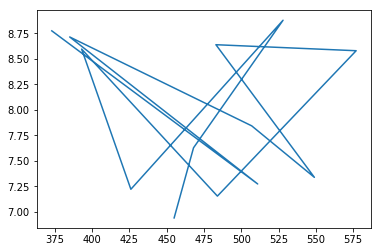

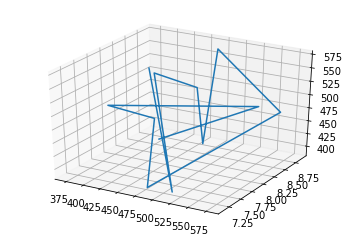

In [9]:
for i in range (19,32):
    print(peaktime[0][i]-peaktime[0][i-1])

    
for i in range (19,32):
    print (df_study4_mbc2['Force2'][peaktime[0][i]])

x = [373,511,385,507,549,483,577,484,393,426,528,468,455]
y = [8.775,7.273,8.715,7.843,7.338,8.639,8.58,7.154,8.596,7.221,8.879,7.628,6.94]
plt.plot(x,y)
# print(peaktime[0][20]-peaktime[0][19])
# print(peaktime[0][21]-peaktime[0][20])
# print(peaktime[0][22]-peaktime[0][21])
# print(peaktime[0][23]-peaktime[0][22])
# print(peaktime[0][24]-peaktime[0][23])
# print(peaktime[0][25]-peaktime[0][24])
# print(peaktime[0][26]-peaktime[0][25])
x = [373,511,385,507,549,483,577,484,393,426,528,468]
z = [511,385,507,549,483,577,484,393,426,528,468,455]
y = [8.775,7.273,8.715,7.843,7.338,8.639,8.58,7.154,8.596,7.221,8.879,7.628]

fig = plt.figure()
ax1 = fig.add_subplot(111,projection='3d')
ax1.plot(x,y,z)
plt.show()

In [10]:
peak = np.array(df_s6_mbc1['Force3'])
peaktime=scipy.signal.argrelmax(peak,order = 50)
print(scipy.signal.argrelmax(peak,order = 50))

(array([  748,   871,   965,  1056,  1334,  1457,  1524,  1698,  1800,
        1923,  2143,  2227,  2754,  2875,  3076,  3200,  3257,  3610,
        3727,  3963,  4129,  4251,  4364,  5104,  5244,  5317,  5525,
        5794,  6062,  6411,  6706,  7005,  7289,  7399,  7503,  7613,
        7676,  7737,  7811,  7880,  7978,  8108,  8256,  8472,  8564,
        9184,  9300,  9570,  9732,  9950, 10097, 10244, 10390, 10792,
       10955, 11122, 11297, 11478, 11680, 11869, 12061, 12533, 12783,
       13075, 13661, 14013, 14407, 15422, 15974, 17125, 17837, 18298,
       18378], dtype=int64),)


163
167
175
181
202
189
192
472
250
292
586
352
394
1015
552
1151
712
461
38.09
38.16
38.5
38.17
39.66
39.12
39.21
41.02
41.16
42.05
42.38
43.01
43.59
43.78
44.33
44.35
44.62
4.2139999999999995


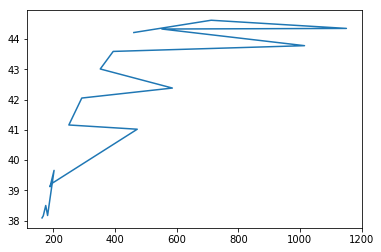

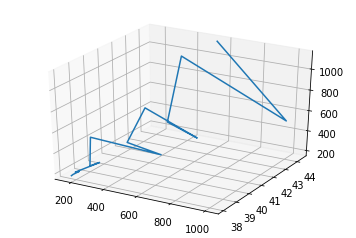

In [11]:
for i in range (54,72):
    print(peaktime[0][i]-peaktime[0][i-1])

    
for i in range (54,72):
    print (df_s6_mbc1['Force3'][peaktime[0][i]])
x = [163,167,175,181,202,189,192,472,250,292,586,352,394,1015,552,1151,712,461]
y = [38.09,38.16,38.5,38.17,39.66,39.12,39.21,41.02,41.16,42.05,42.38,43.01,43.59,43.78,44.33,44.35,44.62,44.2139999999999995]
plt.plot(x,y)


x = [163,167,175,181,202,189,192,472,250,292,586,352,394,1015,552]
z = [167,175,181,202,189,192,472,250,292,586,352,394,1015,552,1151]
y = [38.09,38.16,38.5,38.17,39.66,39.12,39.21,41.02,41.16,42.05,42.38,43.01,43.59,43.78,44.33]


fig = plt.figure()
ax1 = fig.add_subplot(111,projection='3d')
ax1.plot(x,y,z)


In [12]:
peak = np.array(df_s6_mbc1['Force1'])
peaktime=scipy.signal.argrelmax(peak,order = 50)
print(scipy.signal.argrelmax(peak,order = 50))

(array([    3,    68,   131,   200,   270,   346,   447,   597,   750,
         950,  1018,  1087,  1888,  1987,  2061,  2138,  2738,  3007,
        3119,  3201,  3393,  3682,  3969,  4225,  4323,  4589,  4756,
        4915,  5041,  5214,  5355,  5569,  6393,  6698,  6991,  7179,
        7344,  7442,  7611,  7746,  7925,  8126,  8369,  8624,  8936,
        9279,  9585,  9924, 10296, 10697, 11087, 11457, 12194, 12621,
       13032, 13876, 14298, 14745, 15128, 15546, 16294, 16653, 17052,
       17459, 17896, 18294], dtype=int64),)


In [13]:
for i in range (1,66):
    print(peaktime[0][i]-peaktime[0][i-1])

    
for i in range (1,66):
    print (df_s6_mbc1['Force1'][peaktime[0][i]])

65
63
69
70
76
101
150
153
200
68
69
801
99
74
77
600
269
112
82
192
289
287
256
98
266
167
159
126
173
141
214
824
305
293
188
165
98
169
135
179
201
243
255
312
343
306
339
372
401
390
370
737
427
411
844
422
447
383
418
748
359
399
407
437
398
6.164
6.27
6.525
6.406000000000001
7.382999999999999
7.946000000000001
7.9670000000000005
8.63
3.883
3.969
6.455
4.7219999999999995
4.689
4.6739999999999995
7.482
5.765
5.601
5.5520000000000005
5.559
5.452999999999999
5.377000000000001
5.315
5.307
5.2620000000000005
5.188
5.3
5.141
5.127999999999999
5.106
5.311
24.75
26.3
6.792999999999999
5.021
28.67
29.57
28.9
29.04
32.51
34.02
34.82
35.7
35.87
36.68
37.33
37.12
37.54
37.68
37.92
38.01
37.98
38.35
38.28
38.43
38.66
38.46
39.05
38.74
38.68
38.4
38.29
38.47
38.4
38.68
38.54


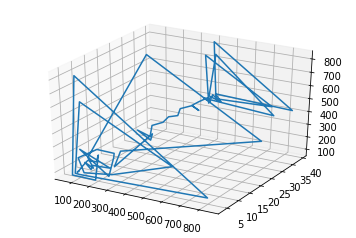

In [14]:
x = [65,63,
69,
70,
76,
101,
150,
153,
200,
68,
69,
801,
99,
74,
77,
600,
269,
112,
82,
192,
289,
287,
256,
98,
266,
167,
159,
126,
173,
141,
214,
824,
305,
293,
188,
165,
98,
169,
135,
179,
201,
243,
255,
312,
343,
306,
339,
372,
401,
390,
370,
737,
427,
411,
844,
422,
447,
383,
418,
748,
359,
399,
407,
437,
]
z = [63,
69,
70,
76,
101,
150,
153,
200,
68,
69,
801,
99,
74,
77,
600,
269,
112,
82,
192,
289,
287,
256,
98,
266,
167,
159,
126,
173,
141,
214,
824,
305,
293,
188,
165,
98,
169,
135,
179,
201,
243,
255,
312,
343,
306,
339,
372,
401,
390,
370,
737,
427,
411,
844,
422,
447,
383,
418,
748,
359,
399,
407,
437,398]
y = [6.164,
6.27,
6.525,
6.406000000000001,
7.382999999999999,
7.946000000000001,
7.9670000000000005,
8.63,
3.883,
3.969,
6.455,
4.7219999999999995,
4.689,
4.6739999999999995,
7.482,
5.765,
5.601,
5.5520000000000005,
5.559,
5.452999999999999,
5.377000000000001,
5.315,
5.307,
5.2620000000000005,
5.188,
5.3,
5.141,
5.127999999999999,
5.106,
5.311,
24.75,
26.3,
6.792999999999999,
5.021,
28.67,
29.57,
28.9,
29.04,
32.51,
34.02,
34.82,
35.7,
35.87,
36.68,
37.33,
37.12,
37.54,
37.68,
37.92,
38.01,
37.98,
38.35,
38.28,
38.43,
38.66,
38.46,
39.05,
38.74,
38.68,
38.4,
38.29,
38.47,
38.4,
38.68]


fig = plt.figure()
ax1 = fig.add_subplot(111,projection='3d')
ax1.plot(x,y,z)